# **Homework 2 Problem 3 (15 points) [TA: Sogol Mansouri]** 

In this workshop, you'll looking at evaluation metrics and hyperparameter turning.

# 0 Loading Data and Libraries

In [90]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import datasets
# Remember you have to run this cell block before continuing!

# We will use this random seed throughout to make things more deterministic for testing
random_seed = 25

# 1 Complete Pipeline

## 1.1 Loading the Data

In this problem you will learn to calculate accuracy, precision, recall and f1-score for a classifier.

In [91]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

raw_data = pd.read_csv('../data/hw2_p3_data.csv')
raw_data

,sentence,sentiment
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0
...,...,...
1523970,just woke up having no school is the best feel...,1
1523971,thewdb com very cool to hear old walt interviews,1
1523972,are you ready for your mojo makeover ask me fo...,1
1523973,happy th birthday to my boo of alll time tupac...,1


We sample a subset of the dataset (stored as "X" and "Y") in order to avoid long running time. Now practice the train/test split function to create a training and testing dataset with the **"random_seed"** we defined at very beginning and the belowed **"test_data_fraction"**

In [92]:
data = raw_data.sample(frac = 0.008, random_state = random_seed)
X = data["sentence"]
Y = data["sentiment"] 

test_data_fraction = 0.2
## TODO: Make the train/test split this time
X_train = None
X_test = None
Y_train = None
Y_test = None


Note that the X features contain just one attribute, a string value from the tweet.

In [93]:
X_train

The y values are True (for polarity = 4) and False otherwise.

In [94]:
Y_train

In [95]:
X_test

In [96]:
Y_test

In [97]:
np.testing.assert_equal(len(X_train),9753)
np.testing.assert_equal(len(Y_test),2439)
np.testing.assert_equal(type(X_test),pd.Series)

TypeError: object of type 'NoneType' has no len()

## 1.2 Classification Pipeline

In this problem you will create a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), which is a nice tool provided by sklearn, to apply a list of transforms or model traning sequencially, pipeline class allows sticking multiple processes into a single estimator, it can be used to automate a machine learning workflow that involves multiple steps. For example:

1. We need to extract our TFIDF features from the twitter data, just like we did in hw2-p2.
2. Then we need to build a classifierusing our new TFIDF features.

The advantage of putting these steps together into a pipeline, is that we can apply them repeatedly, e.g. to the training data and the test data.

Additionally, for hyperparameter tuning, we often use k-fold cross validation, where we have many different training/test datasets, making the pipeline even more useful.

Here is a brief example of how to use pipeline function:

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Put the example in a function so we don't overwrite our variables
def example():
    X, y = make_classification(random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a pipeline composed of a standard scaler, and an SVC classifier
    pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

    # Fit the pipeline to the training data (just like you would any other classifier)
    # Both scaling and fitting will be performed
    pipe.fit(X_train, y_train)

    # Use the fitted pipeline (i.e. the fit scaler and trained classifier) to score the test data
    # This will first scale X_test, then predict y-values for this data, and finally compute accuracy
    accuracy = pipe.score(X_test, y_test)
    print(f"Accuracy: {accuracy}")

example()


Accuracy: 0.88


Now it is your turn to practice the pipeline function, create a pipeline including **1) tfidf vectorizer 2) KNN model (with 5 neighbors)** (You can refer back to the problem in hw2-p2). Store the pipeline object as **KNN_pipeline**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier


KNN_pipeline = None


In [ ]:
np.testing.assert_equal(type(KNN_pipeline),sklearn.pipeline.Pipeline)
np.testing.assert_equal(len(KNN_pipeline.named_steps),2)

Now let's evaluate the knn pipeline, use the training set to train the pipeline and make prediction on the testing set. Compare the result with the true labels of the testing set and calculate the accuracy score. Store the accuracy in the variable **"test_accuracy"** 

In [ ]:
from sklearn.metrics import accuracy_score

test_accuracy = None

test_accuracy

0.6314063140631406

In [ ]:
np.testing.assert_almost_equal(test_accuracy,0.63, decimal=2)

As you can see from the aboved result, the test accuracy is not as good as we expected. Now let's play with some hyperparameter tuning to see whether we can achieve better results with the optimized parameters, choosing the best value for $k$.

Let's take a look at the below example on hyper-parameter tuning of the **KNN_pipeline** we created previously, using the [GridSearchCV](https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html) function. The goal is to find the best value for $k$ (number of neighbors) in the KNN classifier, and we'll test the following values: [1,3,5,7,10].

GridSearchCV will try each of these values, and then determine the best one by performing k-fold crossvalidation _within the training dataset_. If a value of k does well on unseen validation data, it will probably do well with test data.

**HINT**: Select the best hyperparameter value only based on the training data

**Note**: This may take a moment, since the GridSearch performs CV (multiple train/tests splits) with every hyperparameter value, leading to lots of model training and testing.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter we hope to tune.
param_grid = {
    "knn__n_neighbors": [1,3,5,7,10]
}
# Run the hyperparameter tuning with the training dataset, this will take a while to run.
KNN_tuned_pipeline = GridSearchCV(KNN_pipeline, param_grid)
KNN_tuned_pipeline.fit(X_train,Y_train)

# Print out the best parameter as well as the cross-validated score of the best_estimator.
print("Best parameter: {}, CV score = {}:".format(KNN_tuned_pipeline.best_params_,KNN_tuned_pipeline.best_score_))

# Now let's make prediction on the testing data with the best found parameters and check whether we can achieve higher accuracy.
print("The testing accuracy with the best parameter is: {}".format(accuracy_score(KNN_tuned_pipeline.predict(X_test), Y_test)))

Best parameter: {'knn__n_neighbors': 10}, CV score = 0.6552874134237537:
The testing accuracy with the best parameter is: 0.6666666666666666


Now it is your turn. Create the similar pipeline (with the TFIDF vectorizer, followed by a model) for the decision tree and adaboost classifiers. Then perform hyperparameter tuning to create a tuned version of each pipeline. Make sure to fit the pipelines with the **training data** you have -- selecting a hyperparameter using the test data gives an unfair advantage.

For [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), make sure to use the **`random_seed`** we created at very beginning. For the hyperparameter tuning, use the `GridSearchCV` to select the best criterion from **{“gini”, “entropy”}**, and the best  max_depth from **[2,3,4,5]**. 

Make sure to:

1. Create the pipeline
2. Tune it with CV
3. Fit it to the training data

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_tuned_pipeline = None

DT_param_grid = {
    "dt__criterion": [], #TODO: Update this with parameter values
    "dt__max_depth": [] #TODO: Update this with parameter values
}



GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=25))]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [2, 3, 4, 5]})

In [ ]:
# Check the best hyperparameters for DecisionTree
print("Best parameter of DT: {}, CV score = {}:".format(DT_tuned_pipeline.best_params_,DT_tuned_pipeline.best_score_))
print("The testing accuracy with the best parameter of DT is: {}".format(accuracy_score(DT_tuned_pipeline.predict(X_test), Y_test)))

Best parameter of DT: {'dt__criterion': 'gini', 'dt__max_depth': 5}, CV score = 0.5778751199253506:
The testing accuracy with the best parameter of DT is: 0.5629356293562936


In [ ]:
### BEGIN HIDDEN TESTS
np.testing.assert_almost_equal(accuracy_score(DT_tuned_pipeline.predict(X_test), Y_test),0.562, decimal=3)
np.testing.assert_almost_equal(DT_tuned_pipeline.best_score_,0.577, decimal=3)
### END HIDDEN TESTS

For [Adaboost classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), make sure to use the **`random_seed`** we created at very beginning. For the hyperparameter tuning, use the `GridSearchCV` to select the best `n_estimators` from **[2,3,4]**, and the best  learning_rate from **[0.1,0.01,0.001]**.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


ADABOOST_tuned_pipeline = None

ADABOOST_param_grid = {
    "adaboost__n_estimators": [], #TODO: Update this with parameter values
    "adaboost__learning_rate": [] #TODO: Update this with parameter values
}



GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('adaboost',
                                        AdaBoostClassifier(random_state=25))]),
             param_grid={'adaboost__learning_rate': [0.1, 0.01, 0.001],
                         'adaboost__n_estimators': [2, 3, 4]})

In [ ]:
# Check the best hyperparameters for Adaboost
print("Best parameter of ADABOOST: {}, CV score = {}:".format(ADABOOST_tuned_pipeline.best_params_, ADABOOST_tuned_pipeline.best_score_))
print("The testing accuracy with the best parameter of ADABOOST is: {}".format(accuracy_score(ADABOOST_tuned_pipeline.predict(X_test), Y_test)))

Best parameter of ADABOOST: {'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 3}, CV score = 0.5547025719880666:
The testing accuracy with the best parameter of ADABOOST is: 0.5424354243542435


In [ ]:
### BEGIN HIDDEN TESTS
np.testing.assert_almost_equal(accuracy_score(ADABOOST_tuned_pipeline.predict(X_test), Y_test),0.542, decimal=3)
np.testing.assert_almost_equal(ADABOOST_tuned_pipeline.best_score_,0.554, decimal=3)
### END HIDDEN TESTS

## 1.3 Evaluation using `classification_report` 

Sklearn also has a built in function called [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that will give a handy summary of all the popular classification metrics. You can use this for the later questions.

Below, we give an example of how to use the  function to summarize a model's performance.

Precision, Recall and F1 are reported for **each class separately**. For the "False" row, a False is treated as the positive class. For the "True" row, the "True" is treated as the positive class. This is helpful because Precision and Recall are both sensitive to which class is considered positive. **Support** is the number of instances of both classes.

In [ ]:
from sklearn.metrics import classification_report

# Print a classification report for the KNN pipeline we created
print(classification_report(Y_test, KNN_tuned_pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1215
           1       0.71      0.57      0.63      1224

    accuracy                           0.67      2439
   macro avg       0.67      0.67      0.66      2439
weighted avg       0.67      0.67      0.66      2439



Now complete the following functions based on the descriptions in the comments.

In [ ]:
from sklearn.metrics import classification_report

def predict_with_pipeline(pipeline):
    """ 
    You will implement a pipeline to predict for test-cases that performs the following tasks:
        1. Use the tuned pipeline to predict labels Y_predict for X_test.
        3. return the predictions
        
    Your inputs and outputs are as shown below:
    
    Input:
        
        pipeline: A classification/tuned pipeline. 
              Some example classifiers are: KNN_tuned_pipeline, DT_tuned_pipeline, ADABOOST_tuned_pipeline
        
        
    Output:
        predictions: Return the prediction by the classification pipeline on X_test
    """
    
    
def ClassificationReport(Y_test, predictions,output_dict=True):
    """ 
    You will implement this function to outputs the predictions classification report for test-cases that performs the following tasks:
        1. This function will take three parameters:  the Y_test, predictions on X_test using the pipeline, and output_dict for dictionary format report
        2. You can use the sklearn's classification_report function to generate the report
        
        
    Your inputs and outputs are as shown below:
    
    Input:
        
        Y_test: The labels from in the Y_test
        predictions: predictions on X_test using the predict_with_pipeline function.
        output_dict: To generate the report in dictionary format.
        
    return:
        
        classification report  
        
    """
    
    

KNN_predictions = predict_with_pipeline(KNN_tuned_pipeline)

# If output_dict is False, we get a human-readable 
print(ClassificationReport(Y_test, KNN_predictions,output_dict=False))

# Otherwise we can get the report as an object, to get individual values from it
ClassificationReport(Y_test, KNN_predictions,output_dict=True)

              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1215
           1       0.71      0.57      0.63      1224

    accuracy                           0.67      2439
   macro avg       0.67      0.67      0.66      2439
weighted avg       0.67      0.67      0.66      2439



{'0': {'precision': 0.6378600823045267,
  'recall': 0.7654320987654321,
  'f1-score': 0.6958473625140291,
  'support': 1215.0},
 '1': {'precision': 0.709480122324159,
  'recall': 0.5686274509803921,
  'f1-score': 0.6312925170068027,
  'support': 1224.0},
 'accuracy': 0.6666666666666666,
 'macro avg': {'precision': 0.6736701023143429,
  'recall': 0.6670297748729122,
  'f1-score': 0.6635699397604159,
  'support': 2439.0},
 'weighted avg': {'precision': 0.6738022426095821,
  'recall': 0.6666666666666666,
  'f1-score': 0.6634508348794061,
  'support': 2439.0}}

In [ ]:
# Public tests
KNN_predictions = predict_with_pipeline(KNN_tuned_pipeline)
KNN_report = ClassificationReport(Y_test, KNN_predictions)
DT_predictions = predict_with_pipeline(DT_tuned_pipeline)
ADABOOST_predictions = predict_with_pipeline(ADABOOST_tuned_pipeline)
DT_report = ClassificationReport(Y_test, DT_predictions)
ADABOOST_report = ClassificationReport(Y_test, ADABOOST_predictions)

np.testing.assert_almost_equal(KNN_report['1']['precision'],0.709480122324159)
np.testing.assert_almost_equal(DT_report['0']['recall'],0.8938271604938272)
np.testing.assert_almost_equal(ADABOOST_report['0']['f1-score'],0.6605839416058393)

In [ ]:
# Private tests

### BEGIN HIDDEN TESTS

np.testing.assert_almost_equal(KNN_report['False']['precision'],0.6693548387096774)
np.testing.assert_almost_equal(DT_report['True']['recall'],0.22334172963895885)
np.testing.assert_almost_equal(ADABOOST_report['True']['f1-score'],0.3261146496815287)

### END HIDDEN TESTS



KeyError: 'False'

Now let's print the reports for each classifier:

In [ ]:
print('KNN:')
print(ClassificationReport(Y_test, KNN_predictions,output_dict=False))

print('\n')
print('Decision Tree:')
print(ClassificationReport(Y_test, DT_predictions,output_dict=False))

print('\n')
print('Adaboost:')
print(ClassificationReport(Y_test, ADABOOST_predictions,output_dict=False))

KNN:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1215
           1       0.71      0.57      0.63      1224

    accuracy                           0.67      2439
   macro avg       0.67      0.67      0.66      2439
weighted avg       0.67      0.67      0.66      2439



Decision Tree:
              precision    recall  f1-score   support

           0       0.54      0.89      0.67      1215
           1       0.69      0.23      0.35      1224

    accuracy                           0.56      2439
   macro avg       0.61      0.56      0.51      2439
weighted avg       0.61      0.56      0.51      2439



Adaboost:
              precision    recall  f1-score   support

           0       0.52      0.89      0.66      1215
           1       0.65      0.19      0.30      1224

    accuracy                           0.54      2439
   macro avg       0.59      0.54      0.48      2439
weighted avg       0.59      0.54      0

We would be most interested in the 'True' category as this indicates the positive labels, as well as the accuracy scores. Through this process, you should already got three reports for each of the classifiers. Let's make some comparisons, print the reports for each of the classifiers, and which classifier has a better performance?

**YOUR ANSWER HERE**

## 1.4 Evaluation using ROC Curves

Sklearn has some built in methods for [plotting ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html).

The dataset we'll be using for this exercise is the breast cancer dataset, which is used to tell if a certain individal might have breast cancer or not.

### Plotting ROC Curves 

In this section, you will use sklearn API to compute ROC curves and corresponding AUC value. Specifically, you can use [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) and [roc_auc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to compute these values.

**Hint** You may also want to take a look at the `predict_proba` function from different models such as [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict_proba) and [Ada boost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html). You will need to reliy on part of its output since ROC is computed based on proabilities. 

In [ ]:
from sklearn import metrics

def roc_auc(model, x_test, y_test):
    """
    In this function, you will need to implement the following steps.
        1. Use model to compute its probability of predicting a sample as positive for each sample in x_test.
        2. Use the computed probability and y_test to compute ROC curve and its AUC value.
        
    Your inputs and outputs are as shown below:
    
    Input:
        model: A sklearn classifier instance in our case a fine tuned classifier. Assuming it has predict_proba() function.
        x_test: A numpy array of shape (n_test_rows, n_attributes) where n_test_rows refers to the number 
              of rows in your target dataset and n_attributes refers to the number of attributes.
        y_test: A numpy array of shape (n_test_rows, ) where n_test_rows refers to the number 
              of rows in your target dataset and n_attributes refers to the number of attributes.
        
    Output:
        fpr: A list of increasing false positive rates as a part of ROC curve.
        tpr: A list of increasing true positive rates as a part of ROC curve.
        thresholds: A list of decreasing thresholds as a part of ROC curve.
        auc: A single float value that is the computed AUC value.
    """
    
    

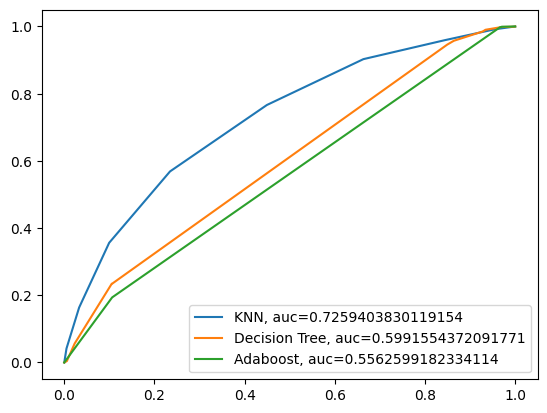

In [ ]:
#Plot the ROC curves
tree_fpr, tree_tpr, tree_thresh, tree_auc = roc_auc(DT_tuned_pipeline, X_test, Y_test)
knn_fpr, knn_tpr, knn_thresh, knn_auc = roc_auc(KNN_tuned_pipeline, X_test, Y_test)
ada_fpr, ada_tpr, ada_thresh, ada_auc = roc_auc(ADABOOST_tuned_pipeline, X_test, Y_test)

plt.figure(0).clf()
plt.plot(knn_fpr,knn_tpr,label="KNN, auc="+str(knn_auc))
plt.plot(tree_fpr,tree_tpr,label="Decision Tree, auc="+str(tree_auc))
plt.plot(ada_fpr,ada_tpr,label="Adaboost, auc="+str(ada_auc))

plt.legend(loc=0)

In [ ]:

np.testing.assert_almost_equal(tree_fpr, [0.0, 0.00576132, 0.02304527, 0.10534979, 0.10617284, 0.84938272,
                                          0.86090535, 0.86419753, 0.92839506, 0.93415638, 0.96296296,
                                          0.96872428, 0.99753086, 1.0])

np.testing.assert_almost_equal(tree_tpr, [0.0, 0.00408497, 0.05637255, 0.23447712, 0.23447712, 0.94607843, 
                                          0.95506536, 0.95751634, 0.98529412, 0.99019608, 0.99673203, 
                                          0.99836601, 0.99918301, 1.0])

np.testing.assert_almost_equal(tree_thresh, [np.inf, 1.0, 0.83093525, 0.72041303, 0.54545455, 0.48403808,
                                             0.46236559, 0.25, 0.24951267, 0.16363636, 0.10144928,
                                             0.09302326, 0.01212121, 0.0])

assert tree_auc == 0.5991554372091771

np.testing.assert_almost_equal(ada_fpr, [0.        , 0.10617284, 0.96625514, 0.97037037, 1.        ])
np.testing.assert_almost_equal(ada_tpr, [0.        , 0.19362745, 0.99754902, 0.99918301, 1.        ])
np.testing.assert_almost_equal(ada_thresh, [np.inf, 0.60419027, 0.48015926, 0.33896994, 0.23681015])
assert ada_auc == 0.5562599182334114


In [ ]:
# Remember there are hidden tests
### BEGIN HIDDEN TESTS
np.testing.assert_almost_equal(knn_fpr, [0.        , 0.00493827, 0.03292181, 0.09958848, 0.2345679 ,
       0.44938272, 0.66337449, 0.8436214 , 0.95555556, 1.        ])
np.testing.assert_almost_equal(knn_tpr, [0.        , 0.04166667, 0.16339869, 0.35620915, 0.56862745,
       0.76633987, 0.90277778, 0.95915033, 0.99183007, 1.        ])
np.testing.assert_almost_equal(knn_thresh, [np.inf, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
assert knn_auc == 0.7259403830119154

### END HIDDEN TESTS


### 2.2 Intepreting ROC curves

Take a look at the above ROC curves. How are they similar? How do they differ? Is one strictly better than the other? In what situations is one better than the other?

**YOUR ANSWER HERE**